# Conjunto de Datos:
Datos de histogramas a fetos en clinica de ginecobstetricia

In [3]:
#%pip install empiricaldist
#%pip install pandas numpy matplotlib
#%pip install seaborn scipy statsmodels

# Librerías

In [4]:
#Manejo de datos y operaciones básicas
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Análisis estadístico
import empiricaldist #No nativa, instalar: pip install empiricaldist
import scipy
import statsmodels.api as sm

#Advertencias
import warnings
warnings.filterwarnings('ignore')

# Carga de datos

In [31]:
df = pd.read_csv('datos_tema_3.csv')
# Renombramos la variable 'baseline value' por baseline
df.rename(columns={'baseline value': 'baseline'}, inplace=True)
df

,baseline,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Tipos de Datos

In [32]:
df.dtypes

baseline                                                  float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Vemos que todas nuestras variables son de tipo numerico. Entendemos como categoricas las siguientes variables:
- fetal_health
- histogram_mode

In [33]:
#Cantidad de variables por tipo
df.dtypes.value_counts()

float64    22
Name: count, dtype: int64

Tenemos un total de 22 variables numericas

# Identificacion de datos nulos

In [34]:
df.isnull().any()

baseline                                                  False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

No poseemos ninguna variable con valores nulos.

# Comportamiento estadístico de los datos

In [35]:
df.describe(include = 'all')

,baseline,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


- Vemos que del total de 2126 registros, tenemos datos completos en todas las variable.
- No tenemos variables cualitativas, solo numericas entonces no describimos las variables tipo object

# Visualizacion de Variables Categoricas
Variable categorica: fetal_health

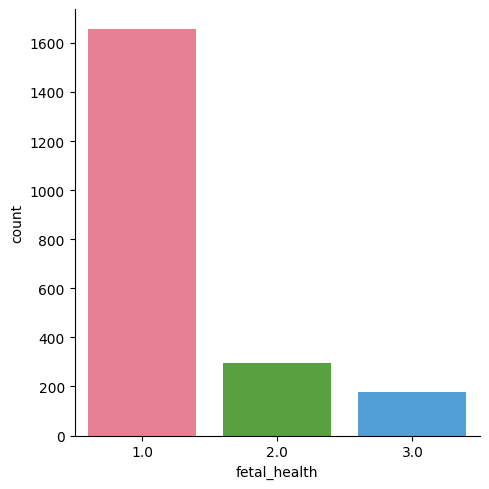

In [38]:
#Salud Cardiaca del Feto
sb.catplot(data = df, x = 'fetal_health', kind = 'count', palette = "husl")
plt.show()

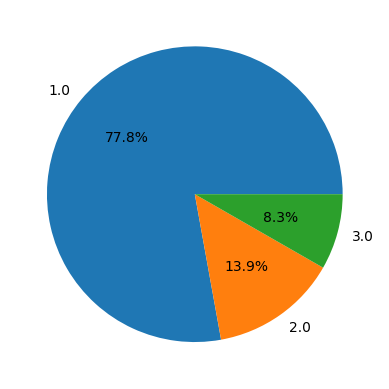

In [39]:
#Gráfico de torta - fetal_health
plt.pie(x = df.fetal_health.value_counts(), labels = df.fetal_health.value_counts().index, autopct = '%0.1f%%')
plt.show()

# Medidas de tendencia central

**Variables Numericas**

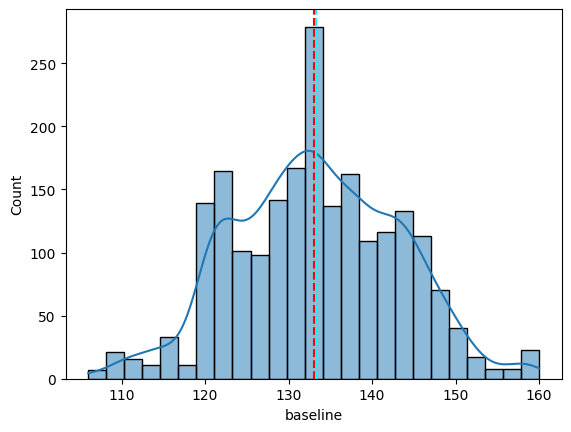

In [36]:
sb.histplot(data = df, x = 'baseline', kde = True)
plt.axvline(x = df.baseline.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.baseline.median(), color = 'red', linestyle = 'dashed')
plt.show()

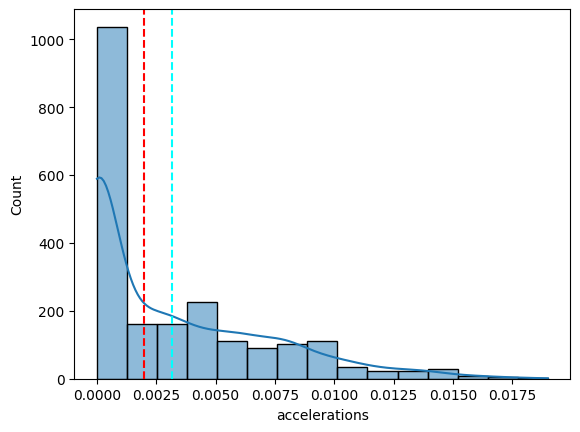

In [40]:
sb.histplot(data = df, x = 'accelerations', kde = True, bins = 15)
plt.axvline(x = df.accelerations.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.accelerations.median(), color = 'red', linestyle = 'dashed')
plt.show()

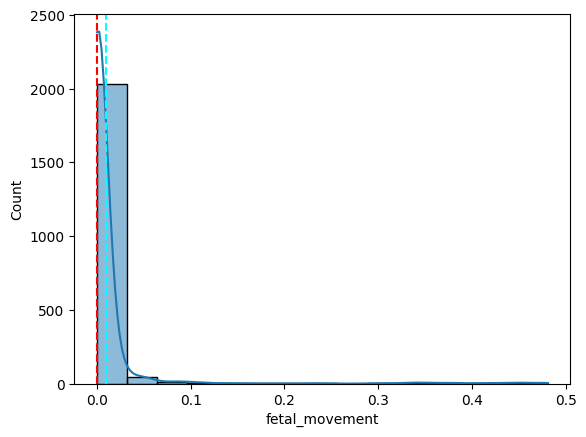

In [41]:
sb.histplot(data = df, x = 'fetal_movement', kde = True, bins = 15)
plt.axvline(x = df.fetal_movement.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.fetal_movement.median(), color = 'red', linestyle = 'dashed')
plt.show()

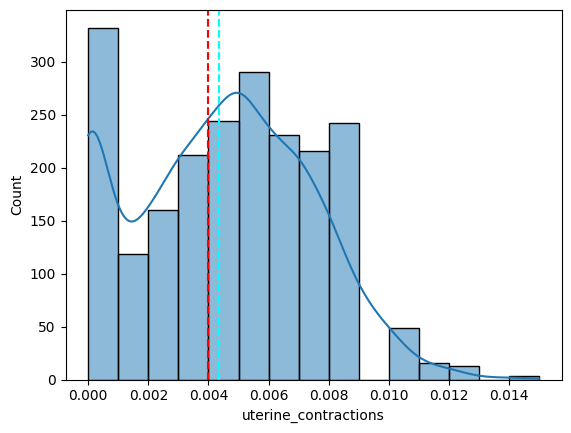

In [42]:
sb.histplot(data = df, x = 'uterine_contractions', kde = True, bins = 15)
plt.axvline(x = df.uterine_contractions.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.uterine_contractions.median(), color = 'red', linestyle = 'dashed')
plt.show()

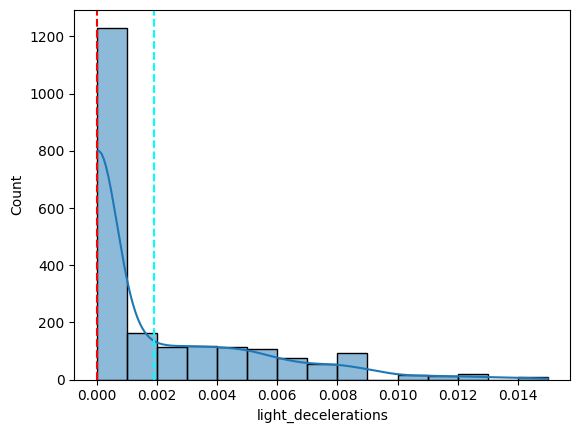

In [43]:
sb.histplot(data = df, x = 'light_decelerations', kde = True, bins = 15)
plt.axvline(x = df.light_decelerations.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.light_decelerations.median(), color = 'red', linestyle = 'dashed')
plt.show()

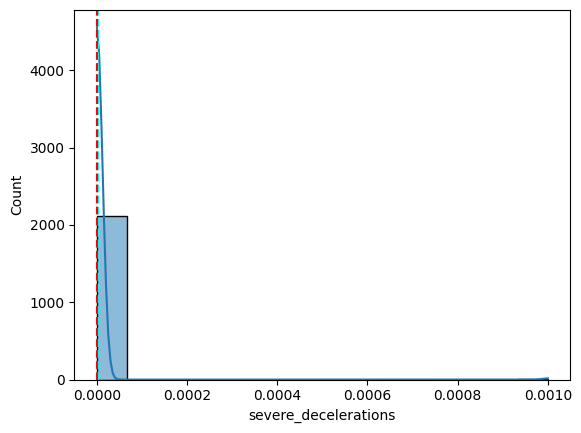

In [44]:
sb.histplot(data = df, x = 'severe_decelerations', kde = True, bins = 15)
plt.axvline(x = df.severe_decelerations.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.severe_decelerations.median(), color = 'red', linestyle = 'dashed')
plt.show()

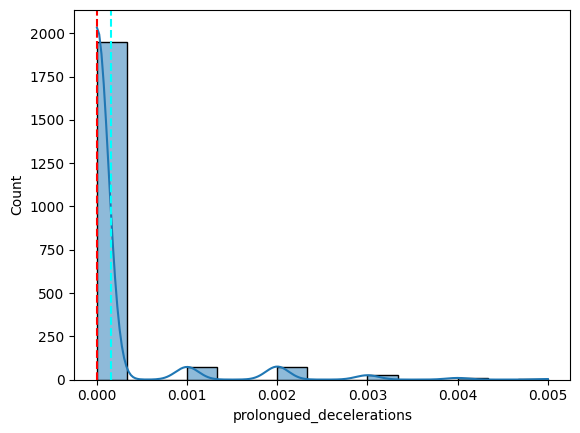

In [45]:
sb.histplot(data = df, x = 'prolongued_decelerations', kde = True, bins = 15)
plt.axvline(x = df.prolongued_decelerations.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.prolongued_decelerations.median(), color = 'red', linestyle = 'dashed')
plt.show()

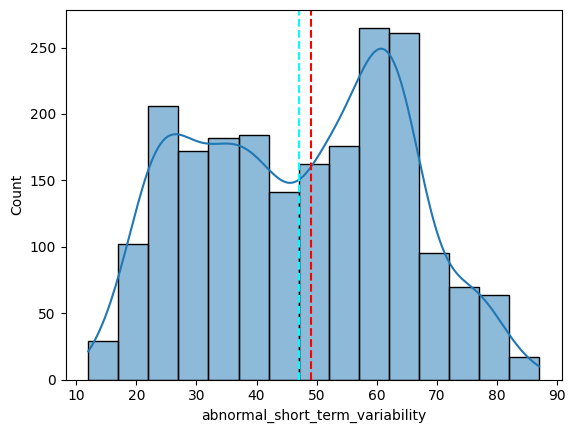

In [46]:
sb.histplot(data = df, x = 'abnormal_short_term_variability', kde = True, bins = 15)
plt.axvline(x = df.abnormal_short_term_variability.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.abnormal_short_term_variability.median(), color = 'red', linestyle = 'dashed')
plt.show()

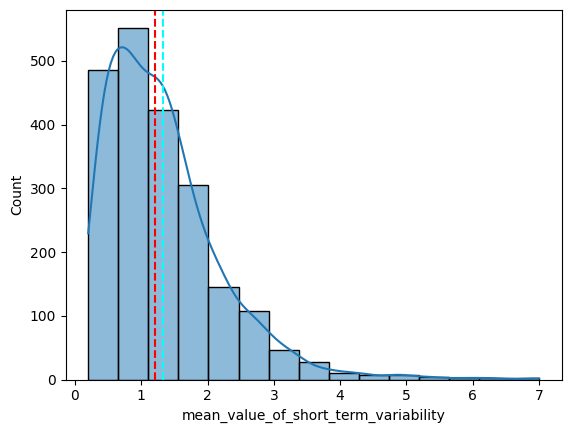

In [47]:
sb.histplot(data = df, x = 'mean_value_of_short_term_variability', kde = True, bins = 15)
plt.axvline(x = df.mean_value_of_short_term_variability.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.mean_value_of_short_term_variability.median(), color = 'red', linestyle = 'dashed')
plt.show()

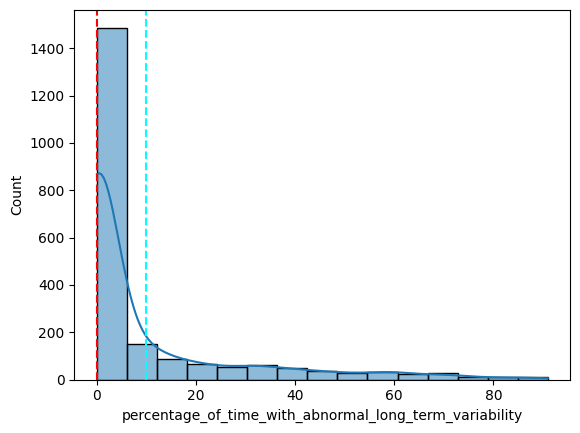

In [48]:
sb.histplot(data = df, x = 'percentage_of_time_with_abnormal_long_term_variability', kde = True, bins = 15)
plt.axvline(x = df.percentage_of_time_with_abnormal_long_term_variability.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.percentage_of_time_with_abnormal_long_term_variability.median(), color = 'red', linestyle = 'dashed')
plt.show()

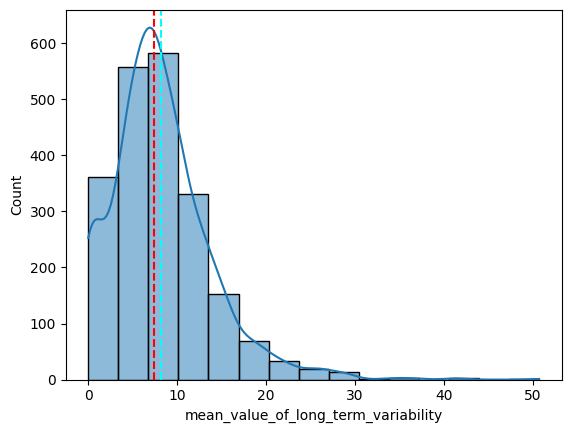

In [49]:
sb.histplot(data = df, x = 'mean_value_of_long_term_variability', kde = True, bins = 15)
plt.axvline(x = df.mean_value_of_long_term_variability.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.mean_value_of_long_term_variability.median(), color = 'red', linestyle = 'dashed')
plt.show()

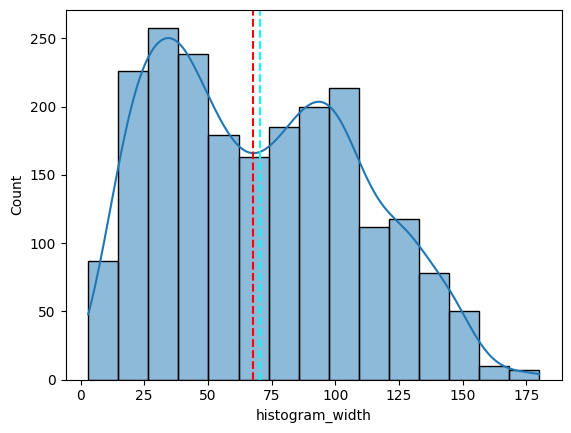

In [50]:
sb.histplot(data = df, x = 'histogram_width', kde = True, bins = 15)
plt.axvline(x = df.histogram_width.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.histogram_width.median(), color = 'red', linestyle = 'dashed')
plt.show()

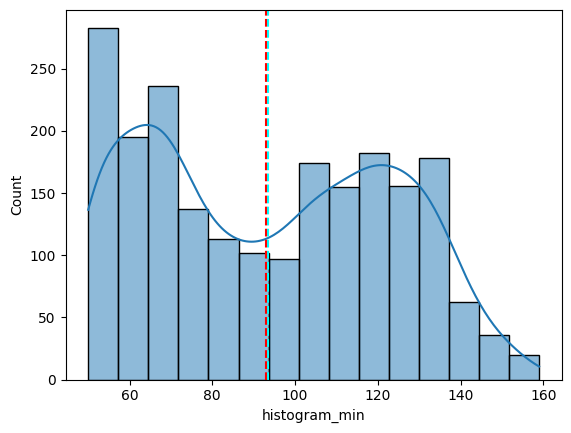

In [51]:
sb.histplot(data = df, x = 'histogram_min', kde = True, bins = 15)
plt.axvline(x = df.histogram_min.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.histogram_min.median(), color = 'red', linestyle = 'dashed')
plt.show()

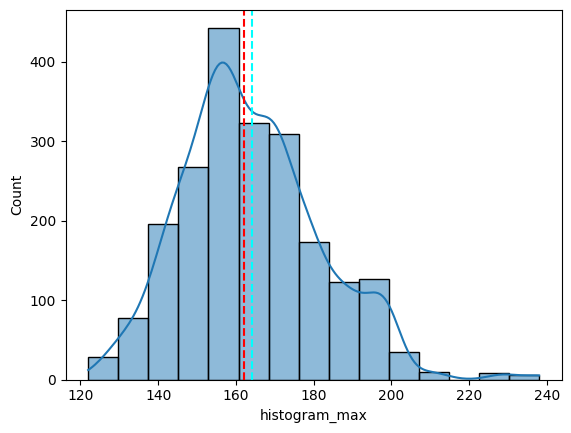

In [52]:
sb.histplot(data = df, x = 'histogram_max', kde = True, bins = 15)
plt.axvline(x = df.histogram_max.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.histogram_max.median(), color = 'red', linestyle = 'dashed')
plt.show()

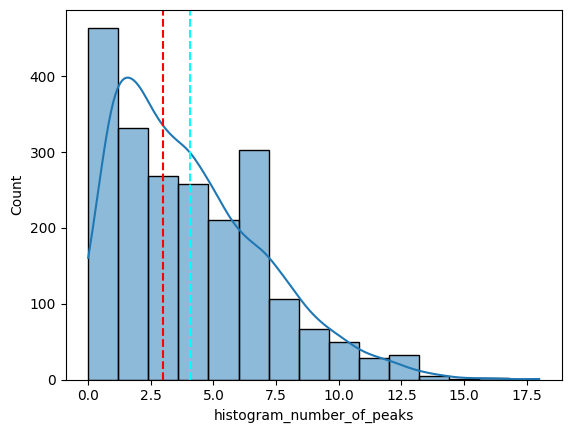

In [53]:
sb.histplot(data = df, x = 'histogram_number_of_peaks', kde = True, bins = 15)
plt.axvline(x = df.histogram_number_of_peaks.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.histogram_number_of_peaks.median(), color = 'red', linestyle = 'dashed')
plt.show()

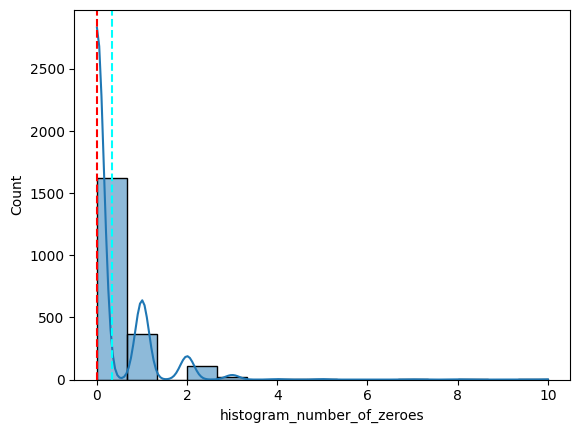

In [54]:
sb.histplot(data = df, x = 'histogram_number_of_zeroes', kde = True, bins = 15)
plt.axvline(x = df.histogram_number_of_zeroes.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.histogram_number_of_zeroes.median(), color = 'red', linestyle = 'dashed')
plt.show()

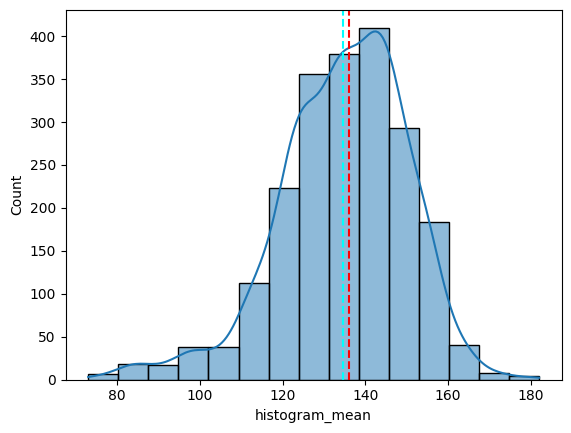

In [55]:
sb.histplot(data = df, x = 'histogram_mean', kde = True, bins = 15)
plt.axvline(x = df.histogram_mean.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.histogram_mean.median(), color = 'red', linestyle = 'dashed')
plt.show()

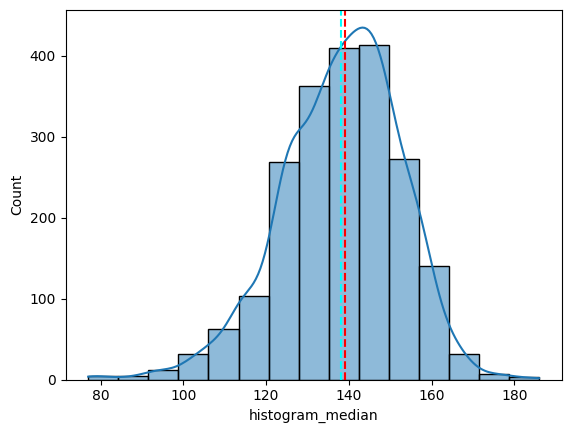

In [56]:
sb.histplot(data = df, x = 'histogram_median', kde = True, bins = 15)
plt.axvline(x = df.histogram_median.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.histogram_median.median(), color = 'red', linestyle = 'dashed')
plt.show()

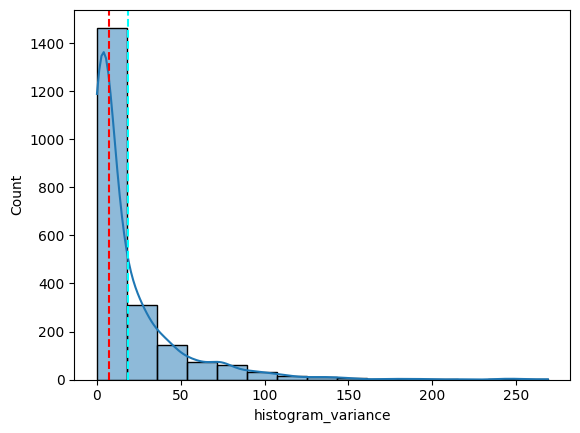

In [57]:
sb.histplot(data = df, x = 'histogram_variance', kde = True, bins = 15)
plt.axvline(x = df.histogram_variance.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.histogram_variance.median(), color = 'red', linestyle = 'dashed')
plt.show()

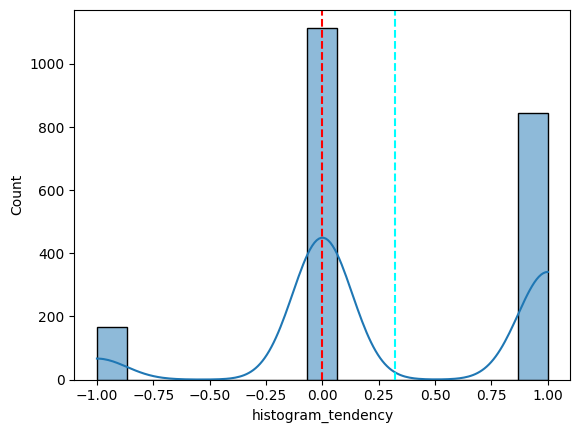

In [58]:
sb.histplot(data = df, x = 'histogram_tendency', kde = True, bins = 15)
plt.axvline(x = df.histogram_tendency.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df.histogram_tendency.median(), color = 'red', linestyle = 'dashed')
plt.show()

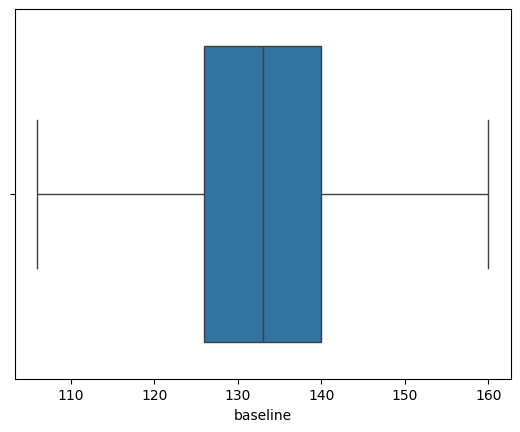

In [59]:
sb.boxplot(data = df, x = 'baseline')
plt.show()

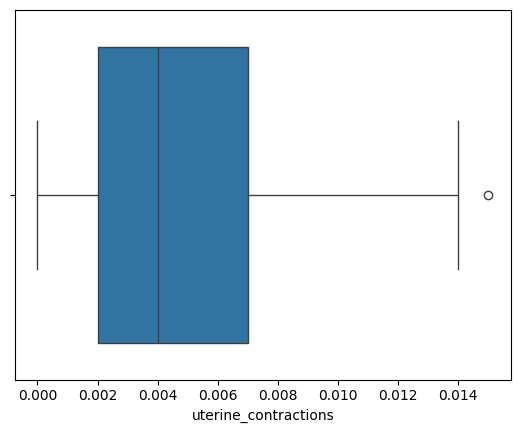

In [61]:
sb.boxplot(data = df, x = 'uterine_contractions')
plt.show()

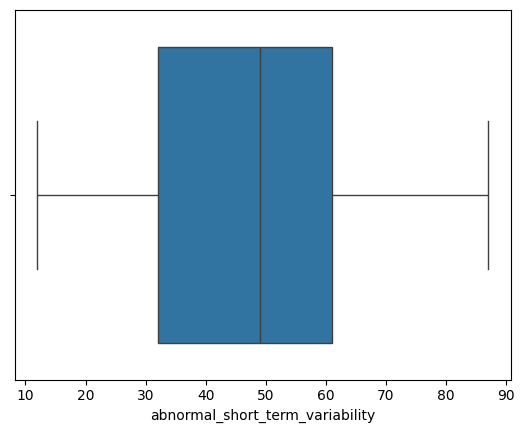

In [62]:
sb.boxplot(data = df, x = 'abnormal_short_term_variability')
plt.show()

# Análisis Bivariado

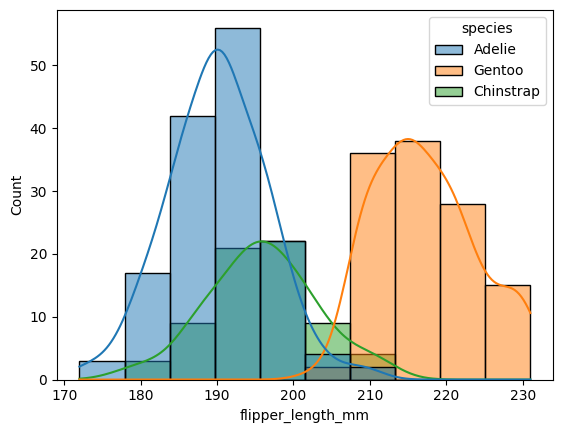

In [28]:
sb.histplot(data = df_proc, x = 'flipper_length_mm', kde = True, hue = 'species')
plt.show()

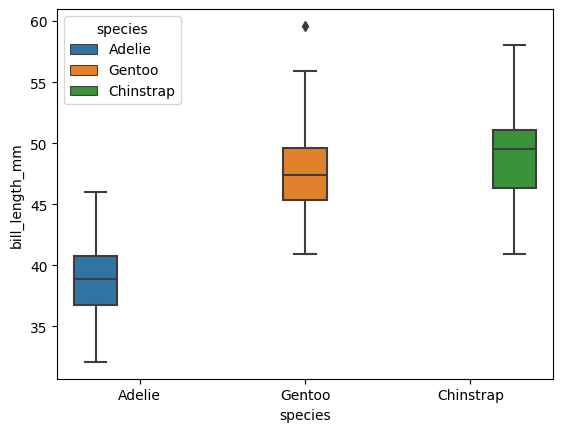

In [29]:
sb.boxplot(data = df_proc, y = 'bill_length_mm', x = 'species', hue = 'species')
plt.show()

Análisis Multivariado

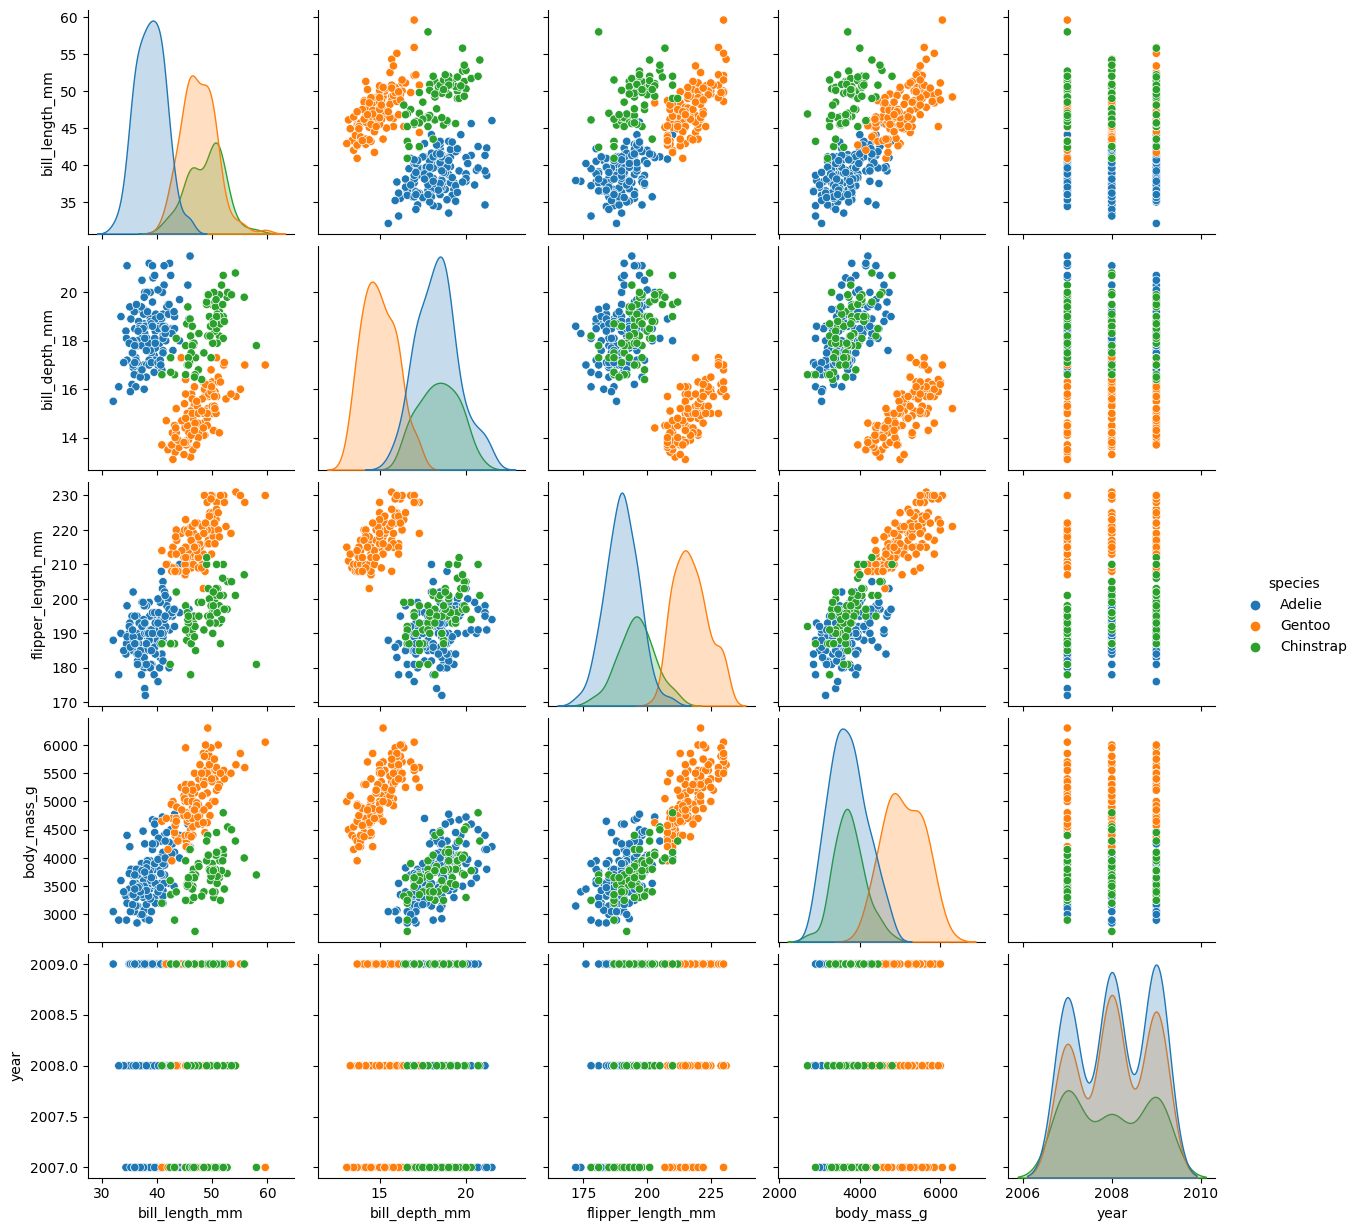

In [30]:
sb.pairplot(data = df_proc, hue = 'species')
plt.show()

In [32]:
df_proc.corr(numeric_only = True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


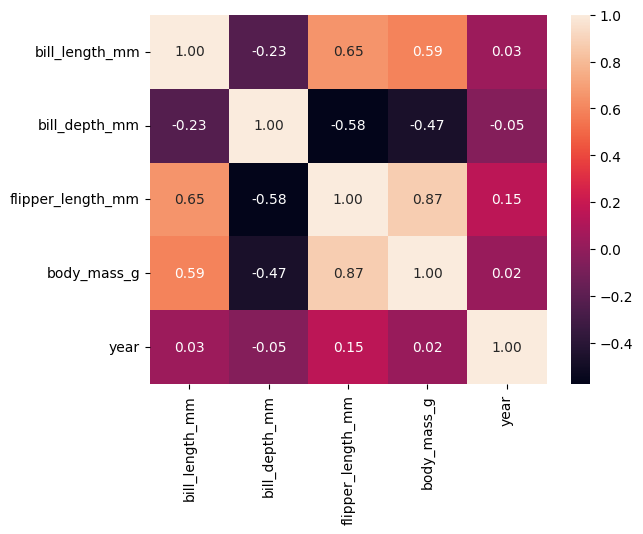

In [35]:
sb.heatmap(data = df_proc.corr(numeric_only = True), annot = True, fmt = '.2f')
plt.show()